## 0. Install and Import Dependencies

In [198]:
%pip install easyocr
%pip install imutils

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [199]:
import cv2 # type: ignore
from matplotlib import pyplot as plt # type: ignore
import numpy as np # type: ignore
import imutils  # type: ignore
import easyocr # type: ignore

## 1. Read in Image, Grayscale and Blur

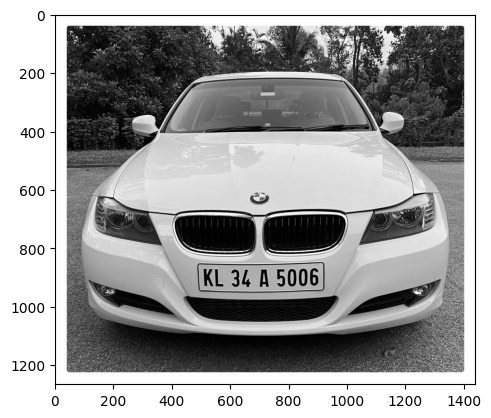

In [200]:
img = cv2.imread('image15.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

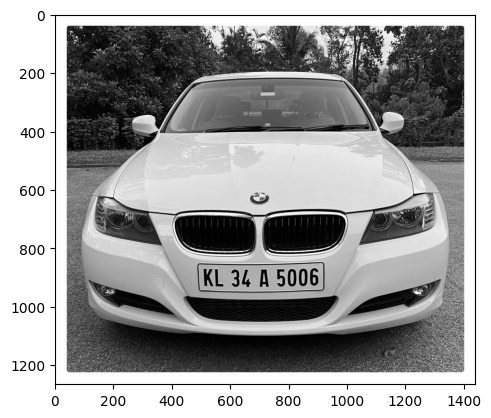

In [201]:
img = cv2.imread('image15.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

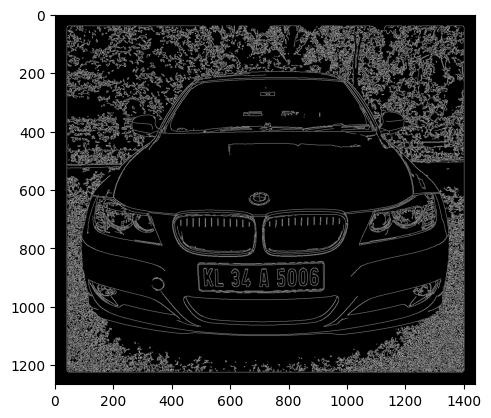

In [202]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [203]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [204]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [205]:
location

array([[[917, 855]],

       [[493, 856]],

       [[494, 941]],

       [[914, 942]]], dtype=int32)

In [206]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

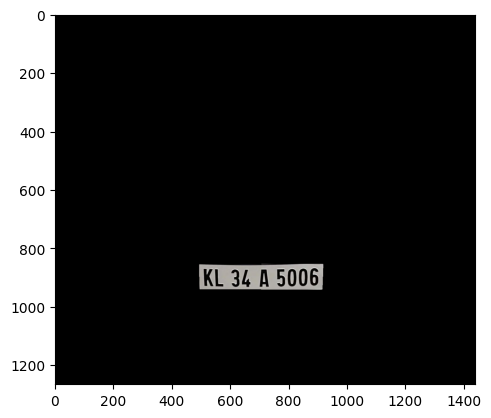

In [207]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [208]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

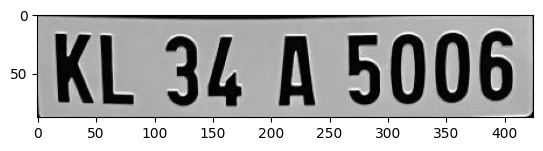

In [209]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [210]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)
licenseplate_result = ''
for i in result:
    licenseplate_result += i[-2] + ' '
licenseplate_result.strip(' ')
bad_chars = [';', ':', '!', "*", ")", "(", ".", ",", " ", '"', "'", "-"]
for i in bad_chars:
    licenseplate_result = licenseplate_result.replace(i, '')
licenseplate_result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 8], [186, 8], [186, 86], [0, 86]], 'KL 34', 0.8553937363061115), ([[201, 2], [422, 2], [422, 88], [201, 88]], 'A 5006', 0.9817728616977003)]


'KL34A5006'

## 5. Render Result

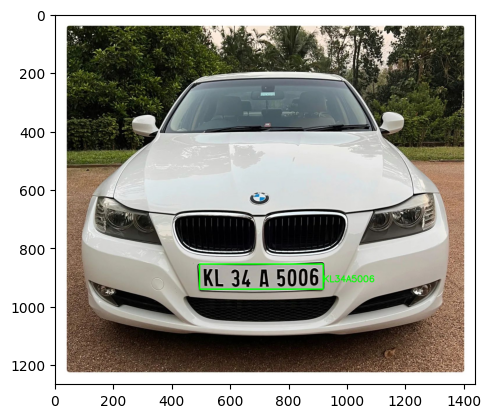

In [211]:
text = licenseplate_result
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))